# Advanced Data Science &amp; Python for Finance (Spring 2020)
## Final Project:  Part 1 - Data Preparation and Exploration 

-----

***FIN580-59305 Ruixin Zhang(individual work)***

Netid: ruixin3 UIN: 670003383

Master of Science in Finance, University of Illinois at Urbana-Champaign

-----
* [1.1 Download the constituents of the S&P 1500 using Capital IQ and read the excel file into the notebook. ](#1.1)
* [1.2 Clean and organize the Excel file that you acquire from Capital IQ. Create a pandas data frame and save the clean file as sp1500.csv](#1.2)
* [1.3 Determine how many constituents and industries are part of the S&P 1500. Before dropping NAs and after dropping NAs.](#1.3)
* [1.4 Determine the top 5 worst & best performing industries based on pct_price_change_ytd.](#1.4)
* [1.5 Create a new data frame for the worst industry and a new data frame for the best industry both based on % Price Change YTD. For each of these new data frames, use the  % Price Change 30 Day to plot the top five ranking for worst and best performance constituents.](#1.5)

## Packages and Settings

**Configuration**

In [134]:
import intrinio_sdk
import configparser as cp

**Scientific Analysis**

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='1.1'></a>
## 1.1 Download the constituents of the S&P 1500 using Capital IQ and read the excel file into the notebook. 

In [136]:
sp1500_df = pd.read_excel('C:/Users/z/Desktop/FIN580 PYTHON/sp1500_raw.xls', skiprows = 14, skipfooter = 12)
sp1500_df.head()

,Company Name,Exchange:Ticker,Currency,Market Cap (mm) [Latest]*†,Revenue (mm),% Price Change [Last Day],% Price Change [30 Day],% Price Change [YTD],% Price Change [12 Month],Price Close,P/E*†,P/BV*†,Primary Industry
0,3D Systems Corporation,NYSE:DDD,USD,924.91,611.82,5.23%,7.53%,(10.29%),(8.72%),7.85,NM,1.89x,"Technology Hardware, Storage and Peripherals"
1,3M Company,NYSE:MMM,USD,85422.41,32348,1.90%,(0.32%),(15.82%),(16.84%),148.51,17.10x,8.42x,Industrial Conglomerates
2,"8x8, Inc.",NYSE:EGHT,USD,1943.63,418.53,0.42%,19.31%,3.66%,(20.99%),18.97,NM,8.71x,Application Software
3,A. O. Smith Corporation,NYSE:AOS,USD,7217.48,2881.4,3.42%,11.36%,(5.98%),(10.95%),44.79,21.51x,4.47x,Building Products
4,"AAON, Inc.",NasdaqGS:AAON,USD,2546.42,492.99,0.74%,(0.22%),(0.95%),3.36%,48.94,47.63x,8.31x,Building Products


In [137]:
sp1500_df.tail()

,Company Name,Exchange:Ticker,Currency,Market Cap (mm) [Latest]*†,Revenue (mm),% Price Change [Last Day],% Price Change [30 Day],% Price Change [YTD],% Price Change [12 Month],Price Close,P/E*†,P/BV*†,Primary Industry
1501,Zebra Technologies Corporation,NasdaqGS:ZBRA,USD,12897.00,4471,3.87%,23.53%,(4.90%),21.43%,242.92,24.61x,7.46x,Electronic Equipment and Instruments
1502,"Zimmer Biomet Holdings, Inc.",NYSE:ZBH,USD,25186.22,7982.2,2.06%,9.51%,(18.59%),(0.57%),121.86,21.83x,2.03x,Health Care Equipment
1503,"Zions Bancorporation, National Association",NasdaqGS:ZION,USD,5033.84,2533,3.89%,4.35%,(40.83%),(36.25%),30.72,9.23x,0.73x,Regional Banks
1504,Zoetis Inc.,NYSE:ZTS,USD,59590.82,6339,0.99%,(1.40%),(5.20%),23.18%,125.47,37.19x,21.64x,Pharmaceuticals
1505,Zumiez Inc.,NasdaqGS:ZUMZ,USD,517.60,1034.13,6.04%,(2.30%),(41.02%),(21.50%),20.37,7.33x,1.13x,Apparel Retail


In [138]:
sp1500_df.columns

Index(['Company Name', 'Exchange:Ticker', 'Currency',
       'Market Cap (mm) [Latest]*†', 'Revenue (mm)',
       '% Price Change [Last Day]', '% Price Change [30 Day]',
       '% Price Change [YTD]', '% Price Change [12 Month]', 'Price Close',
       'P/E*†', 'P/BV*†', 'Primary Industry'],
      dtype='object')

<a id='1.2'></a>
## 1.2 Clean and organize the Excel file that you acquire from Capital IQ. Create a pandas data frame and save the clean file as sp1500.csv

In [139]:
sp1500_df.columns = ['company', 'Exchange:Ticker', 'currency',
                 'marketcap_mm', 'revenue_mm', 'pct_price_change_lastday',
                 'pct_pricechange_30day', 'pct_price_change_ytd', 'pct_price_change_12_month', 
                 'price_close', 'price_earnings_ratio', 'price_bookvalue_ratio', 'industry']

In [140]:
sp1500_df['exchange'] = sp1500_df['Exchange:Ticker'].apply(lambda i:i.split(":")[0])
sp1500_df['ticker']  = sp1500_df['Exchange:Ticker'].apply(lambda i:i.split(":")[1])

In [141]:
sp1500_df = sp1500_df.drop(columns=['Exchange:Ticker','currency'])
sp1500_df.columns

Index(['company', 'marketcap_mm', 'revenue_mm', 'pct_price_change_lastday',
       'pct_pricechange_30day', 'pct_price_change_ytd',
       'pct_price_change_12_month', 'price_close', 'price_earnings_ratio',
       'price_bookvalue_ratio', 'industry', 'exchange', 'ticker'],
      dtype='object')

**Reorder columns**

In [142]:
sp1500_df = sp1500_df[['company','ticker', 'price_close', 'pct_price_change_lastday', 
               'pct_pricechange_30day', 'pct_price_change_ytd', 'pct_price_change_12_month',
               'price_earnings_ratio', 'price_bookvalue_ratio', 'marketcap_mm', 
               'revenue_mm','exchange', 'industry']]

sp1500_df.shape

(1506, 13)

**Remove the Percentage sign, "-" sign and parentheses from pct_price_change_lastday, pct_pricechange_30day, pct_price_change_ytd and pct_price_change_12_month**

In [143]:
pct_price_change_lastday = sp1500_df['pct_price_change_lastday'].apply(lambda x: x.replace('-', ""))
pct_price_change_lastday = pct_price_change_lastday.apply(lambda x: x.replace('(', '-'))
pct_price_change_lastday = pct_price_change_lastday.apply(lambda x: x.replace(')', ''))
pct_price_change_lastday = pct_price_change_lastday.apply(lambda x: x.replace('%', ''))
pct_price_change_lastday = pd.to_numeric(pct_price_change_lastday)

pct_pricechange_30day = sp1500_df['pct_pricechange_30day'].apply(lambda x: x.replace('-', ""))
pct_pricechange_30day = pct_pricechange_30day.apply(lambda x: x.replace('(', '-'))
pct_pricechange_30day = pct_pricechange_30day.apply(lambda x: x.replace(')', ''))
pct_pricechange_30day = pct_pricechange_30day.apply(lambda x: x.replace('%', ''))
pct_pricechange_30day = pd.to_numeric(pct_pricechange_30day)

pct_price_change_ytd = sp1500_df['pct_price_change_ytd'].apply(lambda x: x.replace('-', ""))
pct_price_change_ytd = pct_price_change_ytd.apply(lambda x: x.replace('(', '-'))
pct_price_change_ytd = pct_price_change_ytd.apply(lambda x: x.replace(')', ''))
pct_price_change_ytd = pct_price_change_ytd.apply(lambda x: x.replace('%', ''))
pct_price_change_ytd = pd.to_numeric(pct_price_change_ytd)

pct_price_change_12_month = sp1500_df['pct_price_change_12_month'].apply(lambda x: x.replace('-', ""))
pct_price_change_12_month = pct_price_change_12_month.apply(lambda x: x.replace('(', '-'))
pct_price_change_12_month = pct_price_change_12_month.apply(lambda x: x.replace(')', ''))
pct_price_change_12_month = pct_price_change_12_month.apply(lambda x: x.replace('%', ''))
pct_price_change_12_month = pd.to_numeric(pct_price_change_12_month)

***After careful considerations, I found that we need to do some further data cleaning and processing for some of the other columns not mentioned above in the sp1500_df dataframe, because those columns include "NM" values meaning "non-meaningful values" . We will replace those values with " "(blanks), transforming values from those columns into numeric values and drop those rows using "dropna()" function in the next few steps. Besides, the columns of price_earnings_ratio and price_bookvalue_ratio include character values with a Multiplication sign(x) in the end, we think it's better to remove this sign in both columns and turn those character values to numeric values. We will also replace the "-" signs with blanks in the column of revenue_mm too.***

**Remove the "-"/"NM" signs and replace it with blanks from the columns of price_earnings_ratio, price_bookvalue_ratio & revenue_mm**

In [144]:
price_earnings_ratio = sp1500_df['price_earnings_ratio'].apply(lambda x: x.replace('-', ''))
price_earnings_ratio = price_earnings_ratio.apply(lambda x: x.replace('NM',''))
price_earnings_ratio = price_earnings_ratio.apply(lambda x:x[:-1])
price_earnings_ratio = pd.to_numeric(price_earnings_ratio)

price_bookvalue_ratio = sp1500_df['price_bookvalue_ratio'].apply(lambda x: x.replace('-', ''))
price_bookvalue_ratio = price_bookvalue_ratio.apply(lambda x: x.replace('NM',''))
price_bookvalue_ratio = price_bookvalue_ratio.apply(lambda x:x[:-1])
price_bookvalue_ratio = pd.to_numeric(price_bookvalue_ratio)

revenue_mm  = sp1500_df['revenue_mm'].apply(lambda x: str(x).replace('-', ''))
revenue_mm = pd.to_numeric(revenue_mm)

In [145]:
sp1500_df['pct_price_change_lastday'] = pct_price_change_lastday
sp1500_df['pct_pricechange_30day'] = pct_pricechange_30day
sp1500_df['pct_price_change_ytd'] = pct_price_change_ytd
sp1500_df['pct_price_change_12_month'] = pct_price_change_12_month
sp1500_df['price_earnings_ratio'] = price_earnings_ratio
sp1500_df['price_bookvalue_ratio'] = price_bookvalue_ratio
sp1500_df['revenue_mm'] = revenue_mm

In [146]:
sp1500_df.head()

,company,ticker,price_close,pct_price_change_lastday,pct_pricechange_30day,pct_price_change_ytd,pct_price_change_12_month,price_earnings_ratio,price_bookvalue_ratio,marketcap_mm,revenue_mm,exchange,industry
0,3D Systems Corporation,DDD,7.85,5.23,7.53,-10.29,-8.72,NaN,1.89,924.91,611.82,NYSE,"Technology Hardware, Storage and Peripherals"
1,3M Company,MMM,148.51,1.90,-0.32,-15.82,-16.84,17.10,8.42,85422.41,32348.00,NYSE,Industrial Conglomerates
2,"8x8, Inc.",EGHT,18.97,0.42,19.31,3.66,-20.99,NaN,8.71,1943.63,418.53,NYSE,Application Software
3,A. O. Smith Corporation,AOS,44.79,3.42,11.36,-5.98,-10.95,21.51,4.47,7217.48,2881.40,NYSE,Building Products
4,"AAON, Inc.",AAON,48.94,0.74,-0.22,-0.95,3.36,47.63,8.31,2546.42,492.99,NasdaqGS,Building Products


In [147]:
sp1500_df.tail()

,company,ticker,price_close,pct_price_change_lastday,pct_pricechange_30day,pct_price_change_ytd,pct_price_change_12_month,price_earnings_ratio,price_bookvalue_ratio,marketcap_mm,revenue_mm,exchange,industry
1501,Zebra Technologies Corporation,ZBRA,242.92,3.87,23.53,-4.90,21.43,24.61,7.46,12897.00,4471.00,NasdaqGS,Electronic Equipment and Instruments
1502,"Zimmer Biomet Holdings, Inc.",ZBH,121.86,2.06,9.51,-18.59,-0.57,21.83,2.03,25186.22,7982.20,NYSE,Health Care Equipment
1503,"Zions Bancorporation, National Association",ZION,30.72,3.89,4.35,-40.83,-36.25,9.23,0.73,5033.84,2533.00,NasdaqGS,Regional Banks
1504,Zoetis Inc.,ZTS,125.47,0.99,-1.40,-5.20,23.18,37.19,21.64,59590.82,6339.00,NYSE,Pharmaceuticals
1505,Zumiez Inc.,ZUMZ,20.37,6.04,-2.30,-41.02,-21.50,7.33,1.13,517.60,1034.13,NasdaqGS,Apparel Retail


**After changing all the values to numeric drop any NAs from the data frame**

In [148]:
sp1500_clean_df = sp1500_df.dropna()
sp1500_clean_df.shape

(1190, 13)

In [149]:
sp1500_clean_df.head()

,company,ticker,price_close,pct_price_change_lastday,pct_pricechange_30day,pct_price_change_ytd,pct_price_change_12_month,price_earnings_ratio,price_bookvalue_ratio,marketcap_mm,revenue_mm,exchange,industry
1,3M Company,MMM,148.51,1.90,-0.32,-15.82,-16.84,17.10,8.42,85422.41,32348.00,NYSE,Industrial Conglomerates
3,A. O. Smith Corporation,AOS,44.79,3.42,11.36,-5.98,-10.95,21.51,4.47,7217.48,2881.40,NYSE,Building Products
4,"AAON, Inc.",AAON,48.94,0.74,-0.22,-0.95,3.36,47.63,8.31,2546.42,492.99,NasdaqGS,Building Products
5,AAR Corp.,AIR,18.20,9.05,-1.57,-59.65,-45.93,8.79,0.68,629.15,2218.20,NYSE,Aerospace and Defense
6,"Aaron's, Inc.",AAN,35.78,7.29,51.16,-37.35,-37.85,72.50,1.66,2417.71,4036.83,NYSE,Homefurnishing Retail


In [150]:
sp1500_clean_df.tail()

,company,ticker,price_close,pct_price_change_lastday,pct_pricechange_30day,pct_price_change_ytd,pct_price_change_12_month,price_earnings_ratio,price_bookvalue_ratio,marketcap_mm,revenue_mm,exchange,industry
1501,Zebra Technologies Corporation,ZBRA,242.92,3.87,23.53,-4.90,21.43,24.61,7.46,12897.00,4471.00,NasdaqGS,Electronic Equipment and Instruments
1502,"Zimmer Biomet Holdings, Inc.",ZBH,121.86,2.06,9.51,-18.59,-0.57,21.83,2.03,25186.22,7982.20,NYSE,Health Care Equipment
1503,"Zions Bancorporation, National Association",ZION,30.72,3.89,4.35,-40.83,-36.25,9.23,0.73,5033.84,2533.00,NasdaqGS,Regional Banks
1504,Zoetis Inc.,ZTS,125.47,0.99,-1.40,-5.20,23.18,37.19,21.64,59590.82,6339.00,NYSE,Pharmaceuticals
1505,Zumiez Inc.,ZUMZ,20.37,6.04,-2.30,-41.02,-21.50,7.33,1.13,517.60,1034.13,NasdaqGS,Apparel Retail


In [151]:
sp1500_clean_df.to_csv("C:/Users/z/Desktop/FIN580 PYTHON/sp1500.csv", index = False)

<a id='1.3'></a>
## 1.3 Determine how many constituents and industries are part of the S&P 1500. Before dropping NAs and after dropping NAs.

**Number of constituents and industries in S&P 1500 - BEFORE & AFTER dropping NAs**

In [152]:
## Number of constitutents before dropping NAs
len(np.unique(sp1500_df['company']))

1500

In [153]:
## Number of industries before dropping NAs
len(np.unique(sp1500_df['industry']))

148

In [154]:
## Number of constitutents after dropping NAs
len(np.unique(sp1500_clean_df['company']))

1185

In [155]:
## Number of industries after dropping NAs
len(np.unique(sp1500_clean_df['industry']))

142

In [156]:
##check the number of appearances for S&P 1500 industries who appears more than 10 times after dropping NAs
pd.value_counts(sp1500_clean_df['industry'])[(pd.value_counts(sp1500_clean_df['industry'])>10)]

Regional Banks                             82
Industrial Machinery                       36
Health Care Equipment                      34
Packaged Foods and Meats                   23
Specialty Chemicals                        22
Electric Utilities                         21
Data Processing and Outsourced Services    21
Semiconductors                             20
Property and Casualty Insurance            20
Retail REITs                               20
Application Software                       19
Specialized REITs                          18
Aerospace and Defense                      18
Apparel Retail                             17
Homebuilding                               16
Building Products                          16
Asset Management and Custody Banks         16
Biotechnology                              15
Semiconductor Equipment                    15
Pharmaceuticals                            14
Electrical Components and Equipment        14
Multi-Utilities                   

In [157]:
##check the number of appearances for S&P 1500 industries who appears more than 10 times before dropping NAs
pd.value_counts(sp1500_df['industry'])[(pd.value_counts(sp1500_df['industry'])>10)]

Regional Banks                             88
Health Care Equipment                      42
Industrial Machinery                       41
Oil and Gas Exploration and Production     32
Semiconductors                             28
Application Software                       28
Retail REITs                               26
Property and Casualty Insurance            26
Packaged Foods and Meats                   26
Biotechnology                              25
Specialty Chemicals                        25
Restaurants                                25
Oil and Gas Equipment and Services         23
Data Processing and Outsourced Services    23
Specialized REITs                          22
Aerospace and Defense                      22
Building Products                          22
Pharmaceuticals                            22
Apparel Retail                             21
Semiconductor Equipment                    21
Electric Utilities                         21
Communications Equipment          

### As you can see from the outcomes above, there are 1500 constituents and 148 industries in S&P 1500 before dropping NAs. There are 1185 constituents and 142 industries in S&P 1500 after dropping NAs.

<a id='1.4'></a>
## 1.4 Determine the top 5 worst & best performing industries based on pct_price_change_ytd 

In [158]:
## rank the industries based on the value of pct_price_change_ytd
sp_1500_rank_besttoworst = sp1500_clean_df.groupby('industry')["pct_price_change_ytd"].mean().reset_index().sort_values('pct_price_change_ytd',ascending = False)
sp_1500_rank_worsttobest = sp1500_clean_df.groupby('industry')["pct_price_change_ytd"].mean().reset_index().sort_values('pct_price_change_ytd',ascending = True)

In [159]:
## top 5 best performing industries based on the descending order of pct_price_change_ytd
sp_1500_rank_besttoworst.head(5)

,industry,pct_price_change_ytd
88,Internet and Direct Marketing Retail,31.075
57,Gold,30.080
16,Brewers,27.620
85,Interactive Home Entertainment,26.760
87,Internet Services and Infrastructure,17.100


In [160]:
## top 5 worst performing industries based on the ascending order of pct_price_change_ytd
sp_1500_rank_worsttobest.head(5)

,industry,pct_price_change_ytd
32,Department Stores,-62.545000
96,Mortgage REITs,-60.970000
70,Hotel and Resort REITs,-57.508750
5,Airlines,-57.010000
104,Oil and Gas Equipment and Services,-55.003333


In [161]:
## the names of the top 5 best performing industries in S&P 1500 in a list
sp_1500_best5 = sp_1500_rank_besttoworst["industry"][:5].tolist()
sp_1500_best5

['Internet and Direct Marketing Retail',
 'Gold',
 'Brewers',
 'Interactive Home Entertainment',
 'Internet Services and Infrastructure']

In [162]:
## the names of the top 5 worst performing industries in S&P 1500 in a list
sp_1500_worst5 = sp_1500_rank_worsttobest["industry"][:5].tolist()
sp_1500_worst5

['Department Stores',
 'Mortgage REITs',
 'Hotel and Resort REITs',
 'Airlines',
 'Oil and Gas Equipment and Services']

<a id='1.5'></a>
## 1.5 Create a new data frame for the worst industry and a new data frame for the best industry both based on % Price Change [YTD]. For each of these new data frames, use the % Price Change [30 Day] to plot the top five ranking for worst and best performance constituents.

**Since we use % Price Change [YTD] to measure industry performance in 1.4, we can use the outcome of 1.4 to construct the new data frames for the best and the worst industry**

*Create a new data frame for the worst industry(Department Stores) based on % Price Change(ascending order) [YTD]*

In [163]:
df_worst = sp1500_clean_df.groupby('industry')[['company', 'pct_price_change_ytd','pct_pricechange_30day']].get_group(sp_1500_worst5[0])
df_worst = df_worst.sort_values('pct_price_change_ytd',ascending=True)
df_worst.head()

,company,pct_price_change_ytd,pct_pricechange_30day
817,"Macy's, Inc.",-68.41,-10.65
755,Kohl's Corporation,-64.28,3.88
390,"Dillard's, Inc.",-61.54,-14.98
946,"Nordstrom, Inc.",-55.95,-5.11


*Create a new data frame for the best industry(Internet and Direct Marketing Retail) based on % Price Change(descending order) [YTD]*

In [164]:
df_best = sp1500_clean_df.groupby('industry')[['company', 'pct_price_change_ytd','pct_pricechange_30day']].get_group(sp_1500_best5[0])
df_best = df_best.sort_values('pct_price_change_ytd',ascending=False)
df_best.head()

,company,pct_price_change_ytd,pct_pricechange_30day
1211,Stamps.com Inc.,142.90,48.07
475,"Etsy, Inc.",82.19,58.25
1033,"PetMed Express, Inc.",57.40,26.00
63,"Amazon.com, Inc.",28.78,16.48
432,eBay Inc.,16.73,27.69


**Use the  % Price Change [30 Day] to plot the top five ranking for worst and best performance constituents for the worst industry.**
*Reminder: there are only 4 companies coming from this industry*

In [165]:
df_worst_best5 = df_worst.sort_values('pct_pricechange_30day',ascending=False)[['company','pct_pricechange_30day']]
df_worst_best5

,company,pct_pricechange_30day
755,Kohl's Corporation,3.88
946,"Nordstrom, Inc.",-5.11
817,"Macy's, Inc.",-10.65
390,"Dillard's, Inc.",-14.98


In [166]:
df_worst_worst5 = df_worst.sort_values('pct_pricechange_30day',ascending=True)[['company','pct_pricechange_30day']]
df_worst_worst5

,company,pct_pricechange_30day
390,"Dillard's, Inc.",-14.98
817,"Macy's, Inc.",-10.65
946,"Nordstrom, Inc.",-5.11
755,Kohl's Corporation,3.88


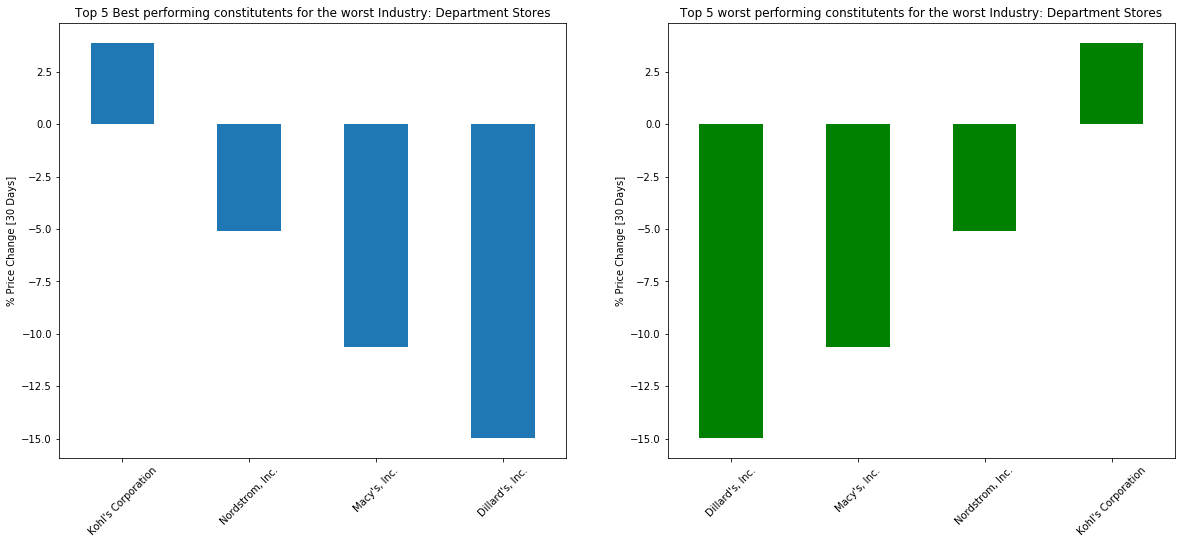

In [167]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(121,  ylabel='% Price Change [30 Days]')
df_worst_best5['pct_pricechange_30day'].plot(kind='bar',ax=ax1)
plt.xticks([0,1,2,3],df_worst_best5['company'].to_list(),rotation=45)
plt.title('Top 5 Best performing constitutents for the worst Industry: Department Stores')

ax2 = fig.add_subplot(122,  ylabel='% Price Change [30 Days]')
df_worst_worst5['pct_pricechange_30day'].plot(kind='bar',ax=ax2, color='g')
plt.xticks([0,1,2,3],df_worst_worst5['company'].to_list(),rotation=45)
plt.title('Top 5 worst performing constitutents for the worst Industry: Department Stores')
plt.show()
##only dour constituents in this industry

**Use the  % Price Change [30 Day] to plot the top five ranking for worst and best performance constituents for the best industry.**

In [168]:
df_best_best5 = df_best.sort_values('pct_pricechange_30day',ascending=False)[['company','pct_pricechange_30day']][:5]
df_best_best5

,company,pct_pricechange_30day
475,"Etsy, Inc.",58.25
1211,Stamps.com Inc.,48.07
432,eBay Inc.,27.69
1033,"PetMed Express, Inc.",26.00
63,"Amazon.com, Inc.",16.48


In [169]:
df_best_worst5 = df_best.sort_values('pct_pricechange_30day',ascending=True)[['company','pct_pricechange_30day']][:5]
df_best_worst5

,company,pct_pricechange_30day
187,Booking Holdings Inc.,4.28
1176,"Shutterstock, Inc.",8.44
484,"Expedia Group, Inc.",14.40
63,"Amazon.com, Inc.",16.48
1033,"PetMed Express, Inc.",26.00


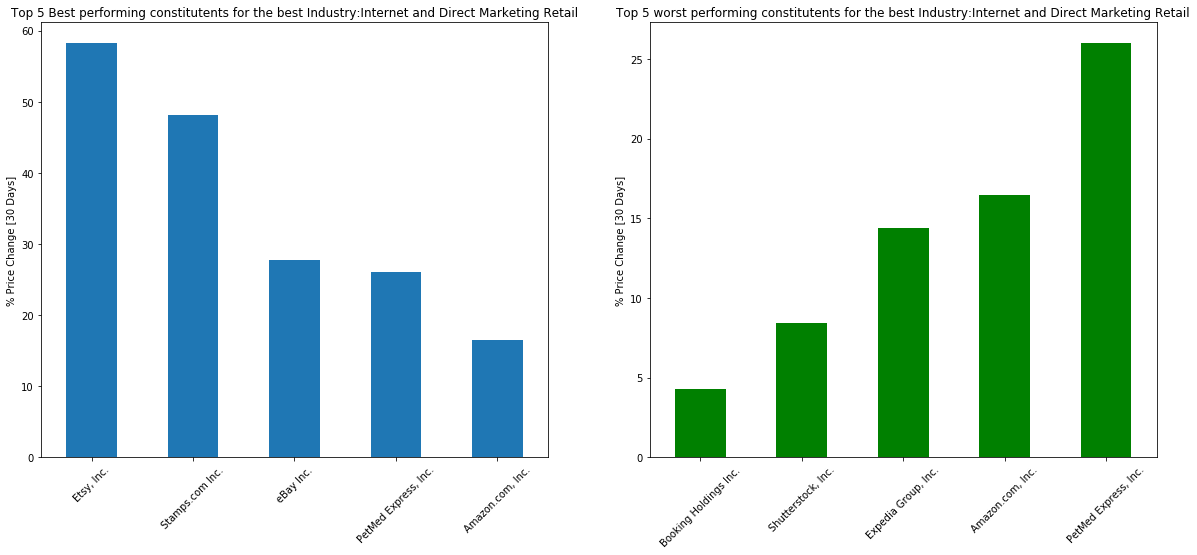

In [170]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(121,  ylabel='% Price Change [30 Days]')
df_best_best5['pct_pricechange_30day'].plot(kind='bar',ax=ax1)
plt.xticks([0,1,2,3,4],df_best_best5['company'].to_list(),rotation=45)
plt.title('Top 5 Best performing constitutents for the best Industry:Internet and Direct Marketing Retail')

ax2 = fig.add_subplot(122,  ylabel='% Price Change [30 Days]')
df_best_worst5['pct_pricechange_30day'].plot(kind='bar',ax=ax2, color='g')
plt.xticks([0,1,2,3,4],df_best_worst5['company'].to_list(),rotation=45)
plt.title('Top 5 worst performing constitutents for the best Industry:Internet and Direct Marketing Retail')
plt.show()